# Comparing 2 Continuous Variables: Correlation

- Check if two variables are related
- Pearson's correlation coefficient or **Pearson's r** is the test statistic
- Unitless; tells us how much two variables tend to move together


- For discrete or non-normal data: Spearman's rank correlation

In [2]:
#standard ds imports
import numpy as np
import pandas as pd

#square root function
from math import sqrt

#stats and plotting
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Abbreviated Hypothesis Testing Procedure:

1. Setup
2. Calculate test statistic + p-value
3. Conclude

### Null hypothesis for this hypothesis test

$H_0$: there is no linear relationship between the two variables

## Example - Exam Data

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv'

In [4]:
#get our data & look at it!
df = pd.read_csv(url)
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


## What's the relationship between exam score and hours studied?

### 1. Setup

- $H_0$: There is no linear relationship
- $H_a$: 

In [1]:
#set the alpha
alpha = .05

### 2. Calculate test statistic + p-value

Let's get a visual on the relationship we are comparing.

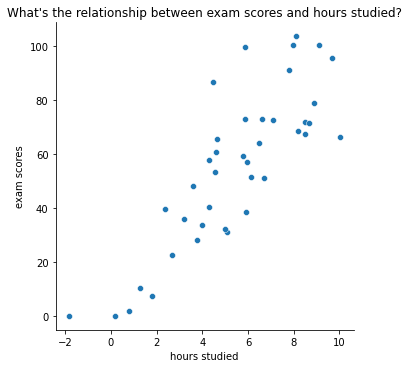

In [5]:
#plot our variables
sns.relplot(data=df, x= 'hours_studied', y= 'exam_score')

plt.title("What's the relationship between exam scores and hours studied?")
plt.xlabel('hours studied')
plt.ylabel('exam scores')
plt.show()

We can see that there is a relationship between are vaules. 

In [8]:
#set x and y variables
x = df.hours_studied
y = df.exam_score

In [9]:
#run stats.pearsonr
stats.pearsonr(x,y)

(0.8351498542413308, 2.0762953315462826e-11)

### 3. Conclude

In [ ]:
#output results
print('r =', r)
print('p =', p)

In [ ]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

> Conclusion:

### Correlation coefficient, r
- tells us the strength of the relationship 
- tells us the direction of the relationship
- values are between -1 and 1

## Examples of Different Correlations

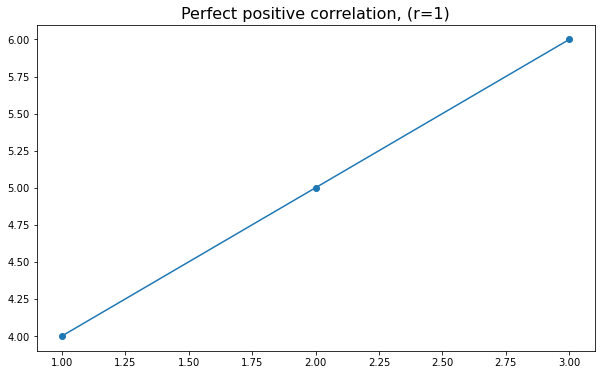

In [10]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)', size=16)
plt.show()

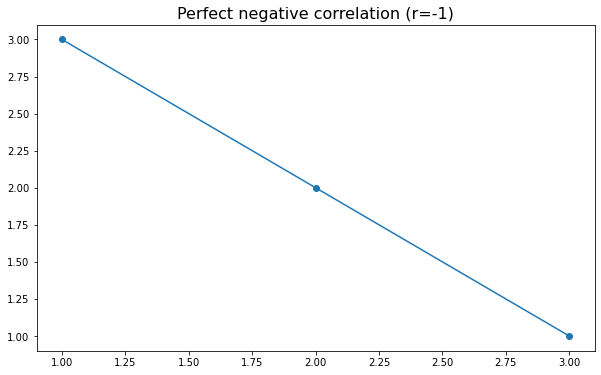

In [11]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)', size=16)
plt.show()

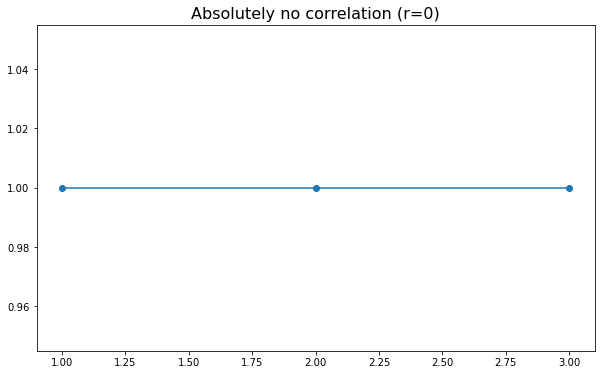

In [12]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)', size=16)
plt.show()

r = 0.03755675667753995


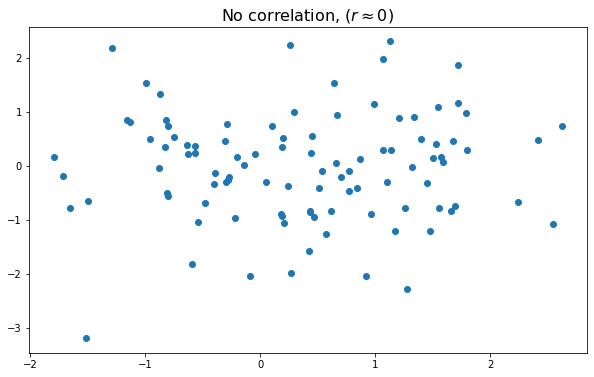

In [13]:
x = np.random.randn(100)
y = np.random.randn(100)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(r'No correlation, ($r \approx 0$)', size=16)

print('r =', r)

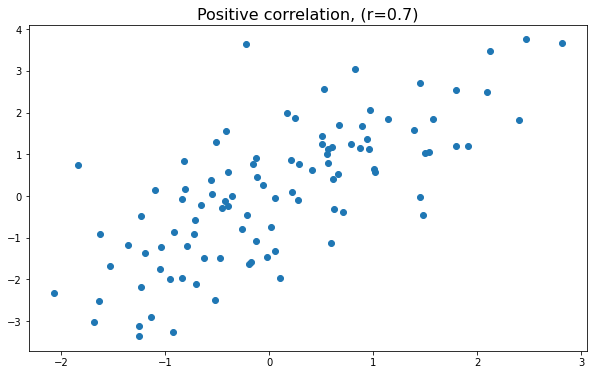

In [14]:
x = np.random.randn(100)
y = x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Positive correlation, (r={round(r,1)})', size=16)
plt.show()

r = -0.6805531267657474
p = 6.763193895884019e-15


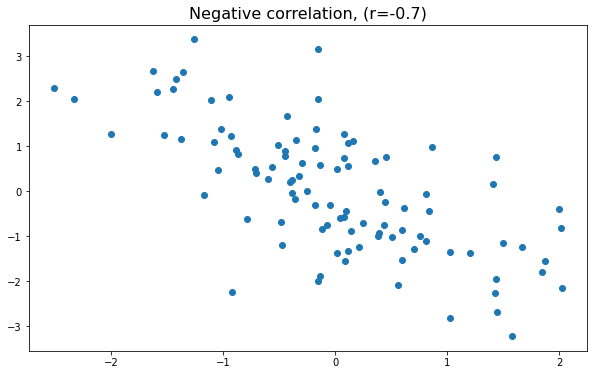

In [15]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Negative correlation, (r={round(r,1)})', size=16)
plt.show()

## Cheat Sheet

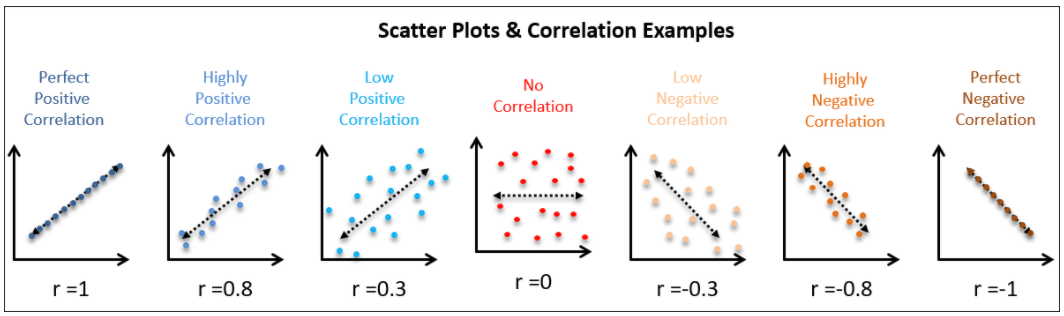

## Now that you're expert correlation-ers

http://guessthecorrelation.com/

## Correlation "gotchas"

When looking at correlation, keep in mind:

1. Correlation is not causation!
2. This is just looking at a *linear* relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

## 1. Example: not causation!

http://www.tylervigen.com/spurious-correlations

## 2. Example: non-linear relationship

- $H_o$: there is no linear relationship between x and y 
- $H_a$: there is a linear relationship between x and y

In [22]:
x = np.linspace(-3, 3)
y = x ** 2

In [23]:
#calculate r and p

r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = -1.5159661290581518e-16
p = 0.999999999999995


In [24]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [ ]:
#plot it

plt.title('Non-linear relationship')
plt.show()

- there is a relationship between x and y
- however, it's NOT linear!

## 3. Example: confounding variable

### What is the relationship between coffee consumed and exam scores?

In [ ]:
#calculate r and p 

print('r = ', r)
print('p = ', p)

In [ ]:
#plot it

plt.title('How does the amount of coffee consumed correlate to exam scores?')
plt.show()

This shows us that exam scores and coffee consumed have a strong negative correlation. 

But is there something else affecting this? 

Yes!!! Probably hours slept! Which is our potential confounder. 

Let's check it out by looking at how hours slept affect both of our variables.

### Let's look at hours slept and coffee consumed

In [ ]:
#calculate r and p


#plot it

plt.title('How does the number of hours slept correlate to coffee consumed?')
print('r=', r)

### Let's look at hours slept and exam scores

In [ ]:
#calculate r and p


#plot it

plt.title('How does the number of hours slept correlate to exam scores?')
print('r=', r)

### This is a confounder

We saw a correlation between our independent variable and dependent variable 
> coffee consumed ----> exam scores 


However, we have a confounder that affects both our independent variable and dependent variable

> hours slept ----> coffee consumed

>  &

> hours slept ----> exam score

Therefore, our confounder caused spurious correlation between our indepedent variable and dependent variable 

## 4. Example: relationship magnitude

### How does coffee consumption relate to exam scores?

In [25]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r= 1.0


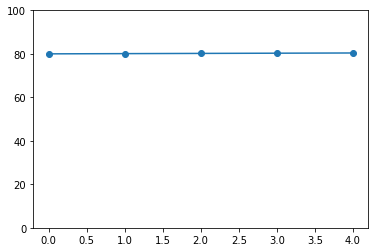

In [26]:
#calculate r and p
r, p = stats.pearsonr(coffee_consumption, exam_score)

#plot it
plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)
print('r=', r)

## Exercise Guidance

What does it mean to "control for"?

Let's look at the relationship between exam scores and hours studied and control for handedness!

### Regular way - Without controling for a variable

In [27]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


#### We're gonna use seaborn to plot this time

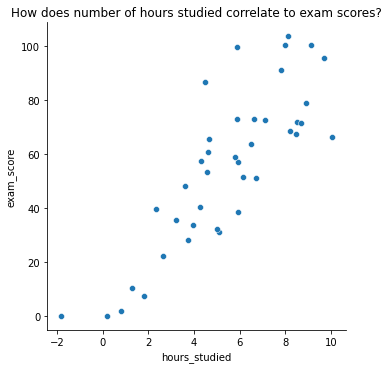

In [28]:
#relpot
sns.relplot(data = df, x='hours_studied', y='exam_score')
plt.title('How does number of hours studied correlate to exam scores?')
plt.show()

In [29]:
#calculate r and p
r,p = stats.pearsonr(df.hours_studied, df.exam_score)
print('r =', r)
print('p =', p)

r = 0.8351498542413308
p = 2.0762953315462826e-11


### Controlling for handedness!

In [30]:
#look at our data
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [31]:
#look at our handedness options (value_counts)
df.handedness.value_counts()

right    23
left     17
Name: handedness, dtype: int64

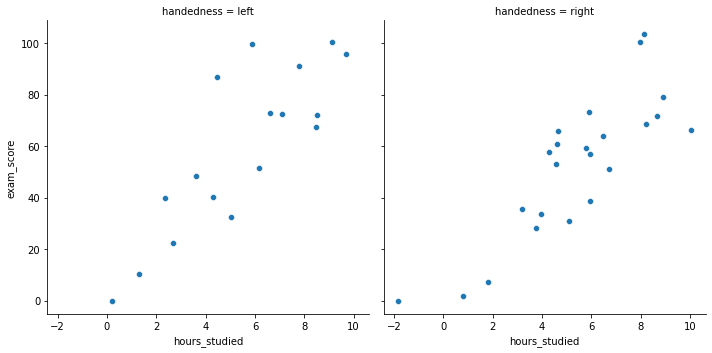

In [33]:
#show separate columns using col
sns.relplot(data=df, x='hours_studied', y='exam_score', col= 'handedness')
plt.show()

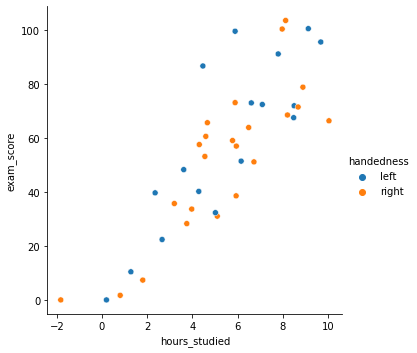

In [34]:
#show separate columns using col
sns.relplot(data=df, x='hours_studied', y='exam_score', hue= 'handedness')
plt.show()

In [ ]:
#show different colors using hue

plt.show()

In [ ]:
#create separate dfs for left and right handedness


In [ ]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print('Lefties')
print('  r =', r)
print('  p =', p)

In [ ]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print('Righties')
print('  r =', r)
print('  p =', p)